In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\babym\OneDrive\Desktop\Project\Blinkit\BlinkIT Grocery Data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
df.size

102276

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [8]:
total_sales= df['Sales'].sum()
avg_sales= df['Sales'].mean()
num_items= df['Sales'].count()
avg_ratings= df['Rating']. mean()

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Number of Items Sold: {num_items:,.0f}")
print(f"Average Rating: {avg_ratings:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141
Number of Items Sold: 8,523
Average Rating: 4.0


## Total Sales by Fat Content

In [14]:
sales_by_fat = df.groupby("Item Fat Content")['Sales'].sum().sort_values(ascending= False)

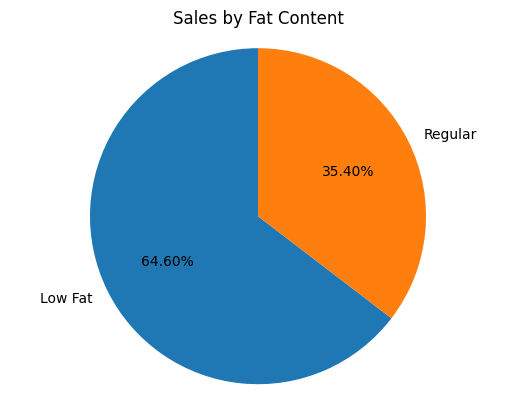

In [19]:
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.2f%%', startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')  
plt.show()

## Total Sales by Item Type

In [22]:
sales_by_item_type = df.groupby("Item Type")['Sales'].sum().sort_values(ascending= False)

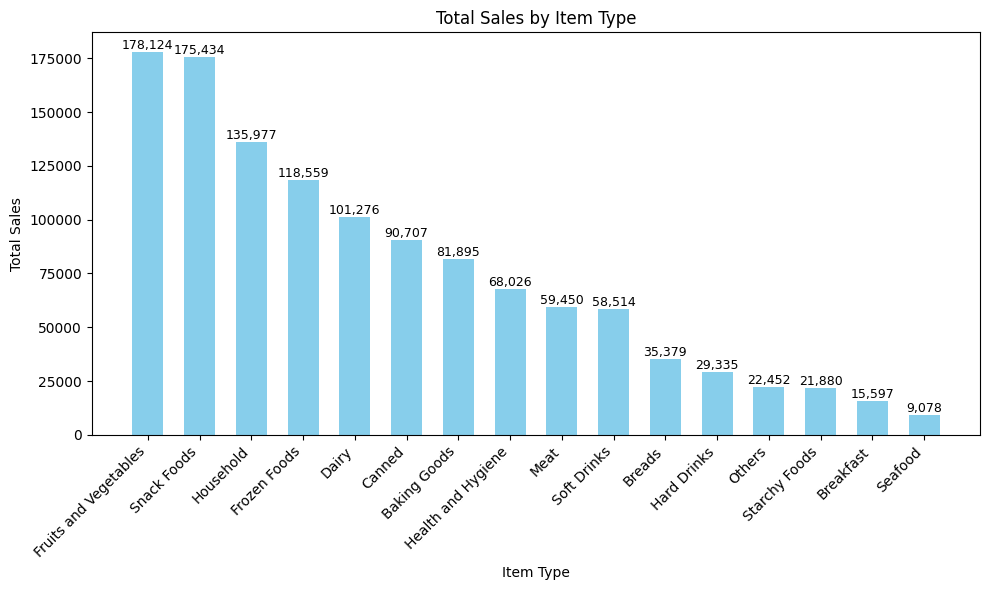

In [25]:
x = np.arange(len(sales_by_item_type))
bar_width = 0.6  # Reduce width for more space between bars

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(x, sales_by_item_type.values, width=bar_width, color='skyblue')

# Labels on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=9)

# Axis and ticks
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(x, sales_by_item_type.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Fat Content by Outlet for Total Sales

In [31]:
sales_by_fat_outlet = df.groupby(["Outlet Location Type", "Item Fat Content"])['Sales'].sum().unstack()
sales_by_fat_outlet

Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7794,138685.8682
Tier 3,306806.9964,165326.0368


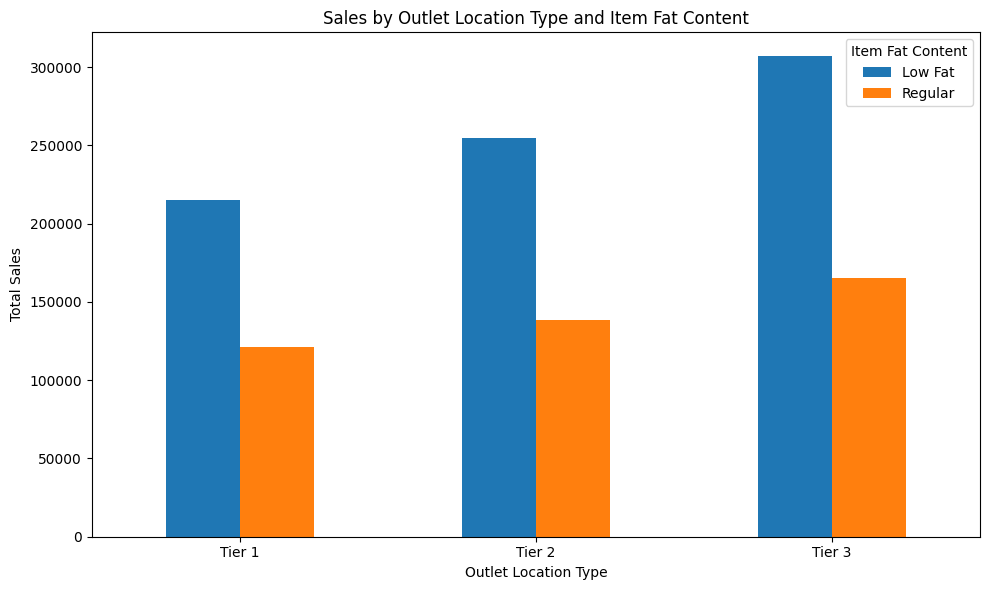

In [33]:
sales_by_fat_outlet.plot(kind='bar', figsize=(10, 6))
plt.title("Sales by Outlet Location Type and Item Fat Content")
plt.ylabel("Total Sales")
plt.xlabel("Outlet Location Type")
plt.xticks(rotation=0)
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()


## Total Sales by Outlet Establishment

In [64]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

Outlet Establishment Year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: Sales, dtype: float64

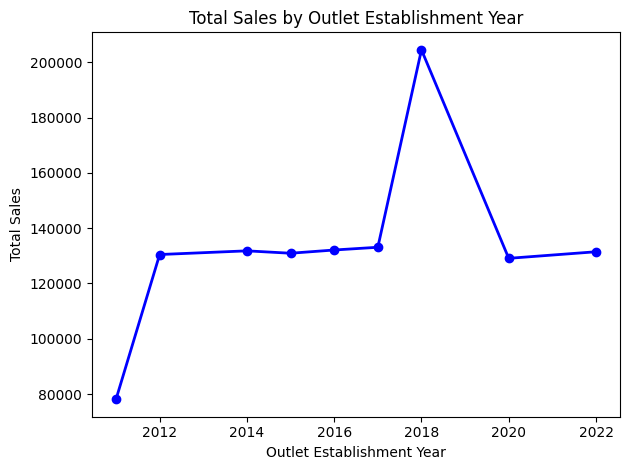

In [63]:
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)


# Adding labels and title
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

## Sales by Outlet Size

In [69]:
sales_by_outlet = df.groupby('Outlet Size')['Sales'].sum().sort_index()

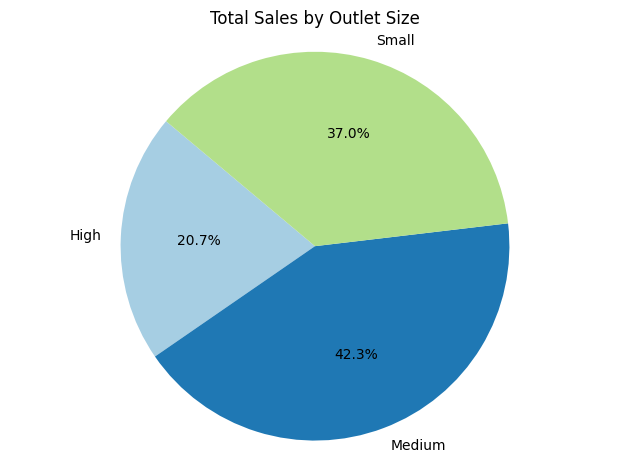

In [70]:
plt.pie(sales_by_outlet.values, labels=sales_by_outlet.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adding a title
plt.title('Total Sales by Outlet Size')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Sales by Outlet Location

In [76]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

# Step 2: Sort by Sales
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

C:\Users\babym\AppData\Local\Temp\ipykernel_2632\3096356507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')


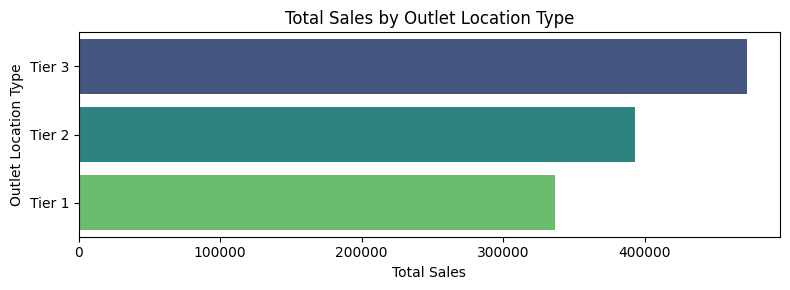

In [77]:
plt.figure(figsize=(8, 3))  # Smaller height, sufficient width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')

# Add title and labels
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()